In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 0 if x=='normal' else 1)
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0


In [4]:
scan = set(['ipsweep', 'portsweep', 'nmap', 'satan'])
dos = set(['neptune', 'smurf', 'pod', 'teardrop', 'land'])
access = set(['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezclient', 'warezmaster'])
exploit = set(['buffer_overflow', 'loadmodule', 'rootkit', 'perl'])
backdoor = set(['back','spy'])

df['attack_category'] = None

for i in range(len(df)):
  attk = df.loc[i,'attack']
  if attk in scan:
    df.loc[i,'attack_category'] = 'scan'
  elif attk in dos:
    df.loc[i,'attack_category'] = 'dos'
  elif attk in access:
    df.loc[i,'attack_category'] = 'access'
  elif attk in exploit:
    df.loc[i,'attack_category'] = 'exploit'
  elif attk in backdoor:
    df.loc[i,'attack_category'] = 'backdoor'
  else:
    df.loc[i,'attack_category'] = 'normal'

In [5]:
# land, wrongfragment,urgent, numfailedlogins,loggedin,rootshell,suattempted,numshells,ishostlogin,isguestlogin
df['land'] = df['land'].astype('category')
df['wrongfragment'] = df['wrongfragment'].astype('category')
df['urgent'] = df['urgent'].astype('category')
#df['numfailedlogins'] = df['numfailedlogins'].astype('category')
df['loggedin'] = df['loggedin'].astype('category')
df['rootshell'] = df['rootshell'].astype('category')
df['suattempted'] = df['suattempted'].astype('category')
df['numshells'] = df['numshells'].astype('category')
df['ishostlogin'] = df['ishostlogin'].astype('category')
df['isguestlogin'] = df['isguestlogin'].astype('category')

In [6]:
# Host count of flags
df['serror'] = df['count']*df['serrorrate']
df['rerror'] = df['count']*df['rerrorrate']

# Host srv count of flags
df['srvserror'] = df['srvcount']*df['srvrerrorrate']
df['srvrerror'] = df['srvcount']*df['srvserrorrate']

df['samesrv'] = df['count']*df['samesrvrate']
df['diffsrv'] = df['count']*df['diffsrvrate']

# Host count of flags
df['dsthostserror'] = df['dsthostcount']*df['dsthostserrorrate']
df['dsthostrerror'] = df['dsthostcount']*df['dsthostrerrorrate']

# Host srv count of flags
df['dsthostsrvserror'] = df['dsthostsrvcount']*df['dsthostsrvrerrorrate']
df['dsthostsrvrerror'] = df['dsthostsrvcount']*df['dsthostsrvserrorrate']

df['dsthostsamesrv'] = df['dsthostsrvcount']*df['dsthostsamesrvrate']
df['dsthostdiffsrv'] = df['dsthostsrvcount']*df['dsthostdiffsrvrate']

In [7]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
all_attacks = df['attack'].unique()

# Step 2: Create a stratified split ensuring that each category is in the test set at least once
train_data = pd.DataFrame()
test_data = pd.DataFrame()

# Split the data by each attack category and ensure they appear in test
for category in all_attacks:
    category_data = df[df['attack'] == category]

    if len(category_data) > 30:
        category_train, category_test = train_test_split(category_data, test_size=0.2,random_state=42)

    elif len(category_data) == 1:
        test_data = pd.concat([test_data,category_data])
        noise_data = category_data.copy()
        noise_data['count'] += 0.0001
        train_data = pd.concat([train_data,noise_data],axis=0)
        continue

    elif len(category_data) > 1 and len(category_data) <= 5:
        all_idx = category_data.index
        chooser = np.random.choice(all_idx,1)
        test_selection = category_data[~category_data.index.isin(chooser)]
        train_selection = category_data[category_data.index.isin(chooser)]

        test_data = pd.concat([test_data,test_selection])
        train_data = pd.concat([train_data,train_selection])

        noise_data = train_selection.copy()
        noise_data['count'] += 0.0001
        train_data = pd.concat([train_data,noise_data],axis=0)
        continue
    
    elif len(category_data) > 5 and len(category_data) <= 10:
        #print('noise to',category)
        all_idx = category_data.index
        chooser = np.random.choice(all_idx,3)
        test_selection = category_data[category_data.index.isin(chooser)]
        train_selection = category_data[~category_data.index.isin(chooser)]

        test_data = pd.concat([test_data,test_selection])
        train_data = pd.concat([train_data,train_selection])
        continue
    

    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    train_data = pd.concat([train_data,category_train])
    test_data = pd.concat([test_data,category_test])

In [8]:
X_train = train_data.drop(['attack','is_attack','attack_category'],axis=1)
y_train = train_data['is_attack']
X_test = test_data.drop(['attack','is_attack','attack_category'],axis=1)
y_test = test_data['is_attack']

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_columns = ['protocoltype', 'service', 'flag','land','wrongfragment','urgent','loggedin','rootshell','suattempted','numshells',
                       'ishostlogin','isguestlogin']

encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

In [10]:
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,class_weight='balanced',n_estimators=100,
                            min_samples_split= 7,
                            max_features= 'sqrt',
                            max_depth= 30)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

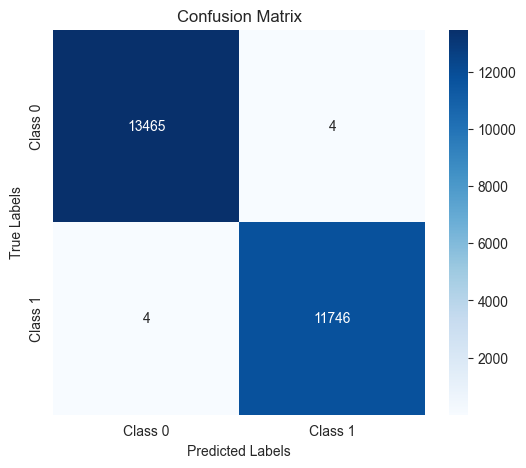

In [12]:
from sklearn.metrics import confusion_matrix


cmrf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cmrf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf,target_names=['normal','attack']))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     13469
      attack       1.00      1.00      1.00     11750

    accuracy                           1.00     25219
   macro avg       1.00      1.00      1.00     25219
weighted avg       1.00      1.00      1.00     25219



In [14]:
y_pred_df = pd.DataFrame(y_pred_rf,index=y_test.index)
y_pred_df.isna().sum()

0    0
dtype: int64

In [15]:
combined_pred = pd.concat([y_test,y_pred_df],axis=1)
combined_pred.columns = ['is_attack','is_attack_pred']
predicted_probabilities = rf.predict_proba(X_test)
combined_pred['predict_prob'] = predicted_probabilities[:, 1]
combined_pred.head()

,is_attack,is_attack_pred,predict_prob
18091,0,0,0.0
29741,0,0,0.0
76709,0,0,0.0
91928,0,0,0.0
39962,0,0,0.0


In [16]:
combined_pred_eq = combined_pred[combined_pred['is_attack'] == combined_pred['is_attack_pred']]
combined_pred_uneq = combined_pred[combined_pred['is_attack'] != combined_pred['is_attack_pred']]
combined_pred_uneq = combined_pred_uneq[combined_pred_uneq['is_attack'] == 1]
combined_pred = pd.concat([combined_pred_eq,combined_pred_uneq],axis=0)
combined_pred.shape

(25215, 3)

In [17]:
op = pd.merge(X_test,combined_pred,left_index=True,right_index=True)
op = pd.merge(op,df[['attack_category','attack']],left_index=True,right_index=True)
op.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,is_attack,is_attack_pred,predict_prob,attack_category,attack
18091,-0.109310,2.223247,-1.176121,0.751235,-0.007738,-0.005282,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,0.182993,2.168315,-0.637508,-0.632041,-0.374377,-0.374536,0.770813,-0.349275,-0.336050,0.736037,1.258282,1.066428,-0.438895,-0.479522,-0.288570,-0.639306,-0.624801,-0.387847,-0.376424,-0.656686,-0.540977,-0.251738,-0.242117,-0.503684,1.161685,-0.196049,-0.62548,-0.343026,-0.173353,-0.418809,1.304689,-0.292250,0,0,0.0,normal,normal
29741,-0.109310,-0.124694,-0.442344,0.751235,-0.007699,-0.002285,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,1.233623,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,-0.585893,-0.148030,-0.637508,-0.632041,-0.374377,-0.374536,0.770813,-0.349275,-0.374559,0.736037,1.258282,1.066428,-0.438895,-0.479522,-0.288570,-0.639306,-0.624801,-0.387847,-0.376424,0.654444,-0.540977,-0.251738,-0.242117,-0.503684,-0.099828,-0.196049,-0.62548,-0.343026,-0.173353,-0.418809,1.304689,-0.292250,0,0,0.0,normal,normal
76709,-0.109310,2.223247,-1.176121,0.751235,-0.007741,-0.005290,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,-0.725690,-0.368634,-0.637508,-0.632041,-0.374377,-0.374536,0.770813,-0.349275,-0.374559,-1.379012,0.734390,1.066428,-0.438895,2.765734,-0.199832,-0.639306,-0.624801,-0.387847,-0.376424,0.654444,-0.540977,-0.251738,-0.242117,-0.503684,-0.329193,-0.196049,-0.62548,-0.343026,-0.173353,-0.418809,0.800660,-0.292250,0,0,0.0,normal,normal
91928,-0.109310,2.223247,1.086357,0.751235,-0.007729,-0.005277,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,-0.673266,-0.368634,-0.637508,-0.632041,-0.374377,-0.374536,-1.185460,1.260422,-0.374559,0.736037,1.204086,1.021869,-0.385953,-0.479522,-0.288570,-0.639306,-0.624801,-0.387847,-0.376424,-0.656686,-0.540977,-0.251738,-0.242117,-0.503684,-0.329480,-0.155956,-0.62548,-0.343026,-0.173353,-0.418809,1.209271,0.212258,0,0,0.0,normal,normal
39962,-0.098889,2.223247,-1.176121,0.751235,-0.007741,-0.005303,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,-0.708215,-0.313483,-0.637508,-0.632041,-0.374377,-0.374536,-0.753260,3.369680,1.165796,-1.207794,-0.755990,-0.002982,-0.174187,-0.414617,-0.288570,-0.639306,-0.624801,-0.387847,-0.376424,0.654444,-0.540977,-0.251738,-0.242117,-0.503684,-0.329337,-0.156351,-0.62548,-0.343026,-0.173353,-0.418809,-0.766696,0.031932,0,0,0.0,normal,normal


In [18]:
op[np.logical_and(op['is_attack'] == 1,op['is_attack_pred'] == 0)]

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,is_attack,is_attack_pred,predict_prob,attack_category,attack
35434,-0.086152,-0.124694,1.758985,0.379490,-0.007726,-0.005270,-0.013733,-0.091207,-0.007426,0.365143,21.381696,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,-0.72569,-0.368634,1.602008,1.604973,-0.374377,-0.374536,0.770813,-0.349275,-0.374559,-1.822165,-1.036001,1.066428,-0.438895,2.765734,-0.288570,1.609093,1.618990,-0.387847,-0.376424,-1.093730,-0.529535,-0.251738,-0.242117,-0.338352,-0.329193,-0.196049,-0.616534,-0.343026,-0.173353,-0.319178,-0.902610,-0.292250,1,0,0.335548,access,guess_passwd
59000,-0.109310,-0.124694,-0.686936,0.751235,-0.007648,-0.005310,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,1.233623,-0.021129,-0.036764,-0.025728,0.059730,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,-0.72569,-0.354847,-0.637508,-0.632041,-0.374377,-0.374536,0.770813,-0.349275,3.476329,-1.822165,-0.286294,1.066428,-0.438895,2.765734,-0.111093,-0.639306,-0.624801,-0.387847,-0.376424,-5.464163,-0.540977,-0.251738,-0.242117,-0.503684,-0.329193,-0.196049,-0.625480,-0.343026,-0.173353,-0.418809,-0.181327,-0.292250,1,0,0.196401,access,ftp_write
52662,-0.109310,-0.124694,-0.809233,-0.735746,-0.007745,-0.005310,72.814834,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,-0.72569,-0.354847,1.602008,1.604973,-0.374377,-0.374536,0.770813,-0.349275,3.476329,-1.711377,-0.963740,-0.983275,0.461112,-0.219902,2.639803,0.664765,-0.377984,-0.387847,-0.376424,-2.841903,-0.529535,-0.251738,-0.242117,-0.173019,-0.329193,-0.196049,-0.563216,-0.343026,-0.173353,-0.320175,-0.905043,0.017749,1,0,0.468648,dos,land
21445,0.006095,-0.124694,1.758985,0.751235,-0.007728,-0.005121,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,-0.72569,-0.368634,-0.637508,-0.632041,-0.374377,-0.374536,0.770813,-0.349275,-0.374559,0.736037,-0.611468,-0.738201,-0.333012,-0.479522,-0.288570,-0.144658,0.070774,-0.387847,-0.376424,-4.590076,-0.540977,-0.251738,-0.242117,-0.503684,-0.329193,-0.196049,-0.123611,-0.343026,-0.173353,1.063695,-0.832046,-0.097741,1,0,0.217307,backdoor,spy


In [19]:
attacks = op[np.logical_or(op['is_attack_pred'] == 1,np.logical_or(op['is_attack_pred'] == 1,op['is_attack'] == 1))].copy()
attacks.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,is_attack,is_attack_pred,predict_prob,attack_category,attack
25445,-0.10931,-0.124694,1.086357,-0.735746,-0.007745,-0.00531,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,1.100413,-0.327271,1.602008,1.604973,-0.374377,-0.374536,-1.458428,-0.016234,-0.374559,0.736037,-1.008903,-1.116951,-0.068304,-0.479522,-0.28857,1.609093,1.618990,-0.387847,-0.376424,0.654444,1.861680,-0.251738,-0.242117,0.157647,-0.283320,0.052804,1.655744,-0.343026,-0.173353,-0.020287,-0.910605,-0.235518,1,1,1.0,dos,neptune
71233,-0.10931,-0.124694,1.453245,-0.735746,-0.007745,-0.00531,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,1.275160,-0.299695,1.602008,1.604973,-0.374377,-0.374536,-1.435681,-0.016234,-0.374559,0.736037,-0.873414,-1.005554,-0.121245,-0.479522,-0.28857,1.609093,1.618990,-0.387847,-0.376424,0.217400,2.090504,-0.251738,-0.242117,0.488312,-0.244615,0.076504,1.655744,-0.343026,-0.173353,1.474173,-0.899742,-0.061270,1,1,1.0,dos,neptune
30788,-0.10931,-0.124694,1.086357,-2.222727,-0.007745,-0.00531,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,1.187787,-0.313483,-0.637508,-0.632041,2.746180,2.713674,-1.458428,0.039273,-0.374559,0.736037,-0.999871,-1.116951,-0.068304,-0.479522,-0.28857,-0.639306,-0.624801,2.873455,2.754375,0.654444,-0.540977,3.211312,1.514909,-0.503684,-0.280453,0.108105,-0.625480,3.321313,0.002507,-0.418809,-0.910431,-0.221335,1,1,1.0,dos,neptune
30951,-0.10931,-0.124694,1.086357,-2.222727,-0.007745,-0.00531,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,0.174256,-0.368634,-0.637508,-0.632041,2.746180,2.713674,-1.481176,0.150286,-0.374559,0.736037,-1.036001,-1.161510,0.037579,-0.479522,-0.28857,-0.639306,-0.624801,2.873455,2.754375,0.654444,-0.540977,1.385340,0.109288,-0.503684,-0.328620,-0.011187,-0.625480,3.321313,-0.138181,-0.418809,-0.911300,-0.274014,1,1,1.0,dos,neptune
111798,-0.10931,-0.124694,1.086357,-2.222727,-0.007745,-0.00531,-0.013733,-0.091207,-0.007426,-0.095657,-0.026347,-0.810621,-0.021129,-0.036764,-0.025728,-0.021314,-0.026258,-0.018455,-0.040422,0.0,-0.00315,-0.097769,0.934404,-0.285908,-0.637508,-0.632041,2.746180,2.713674,-1.412933,0.039273,-0.374559,0.736037,-0.981805,-1.094671,-0.015362,-0.479522,-0.28857,-0.639306,-0.624801,2.873455,2.754375,0.654444,-0.540977,2.754819,2.217720,-0.503684,-0.234007,0.068012,-0.625480,3.321313,0.072851,-0.418809,-0.909475,-0.178786,1,1,1.0,dos,neptune


In [22]:
attacks.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'lastflag', 'serror',
       'rerror', 'srvserror', 'srvrerror', 'samesrv', 'diffsrv',
       'dsthostserror', 'dsthostrerror', 'dsthostsrvserror',
       'dsthostsrvrerror', 'dsthostsamesrv', 'dsthostdiffsrv', 'is_attack',
       'is_attack_pred', 'predict_prob', 'attack_ca

In [24]:
from sklearn.ensemble import IsolationForest

# Assuming df is the dataset, and the 'target' column holds the categories
target_column = 'attack'

# Drop the target column for training the Isolation Forest
features = attacks.drop(columns=['is_attack',
       'is_attack_pred', 'predict_prob', 'attack_category', 'attack'])

# Initialize the IsolationForest model
iso_forest = IsolationForest(contamination=0.05)  # Set contamination to 5%, you can adjust this
iso_forest.fit(features)

# Get the outlier prediction (-1 for outliers, 1 for inliers)
outlier_predictions = iso_forest.predict(features)

# Add the predictions to the original dataframe
attacks['outlier'] = outlier_predictions

# Now, aggregate by category to check how many outliers are in each category
category_outliers = attacks.groupby(target_column)['outlier'].value_counts()

# To find the categories that are outliers (those that have a high proportion of -1)
category_outlier_proportion = attacks.groupby(target_column)['outlier'].apply(lambda x: (x == -1).mean())

# Sort categories by their proportion of outliers
sorted_category_outliers = category_outlier_proportion.sort_values(ascending=False)

# Categories with a high proportion of outliers are the ones we consider different
print("Categories with a high proportion of outliers:")
print(sorted_category_outliers)

# # Optionally, you can define a threshold to classify categories as outliers based on their proportion of outliers
# threshold = 0.2  # You can set this based on your judgment (e.g., categories with > 20% outliers)
# outlier_categories = sorted_category_outliers[sorted_category_outliers > threshold]

# print("Outlier Categories:")
# print(outlier_categories)


Categories with a high proportion of outliers:
attack
back               1.000000
guess_passwd       1.000000
phf                1.000000
imap               0.750000
buffer_overflow    0.666667
land               0.500000
warezclient        0.387640
ftp_write          0.333333
loadmodule         0.333333
teardrop           0.251397
satan              0.185695
pod                0.097561
smurf              0.058491
portsweep          0.054514
ipsweep            0.027778
nmap               0.013378
neptune            0.003154
multihop           0.000000
perl               0.000000
rootkit            0.000000
spy                0.000000
warezmaster        0.000000
Name: outlier, dtype: float64


In [32]:
category_outlier_proportion[category_outlier_proportion>0.3]

attack
back               1.000000
buffer_overflow    0.666667
ftp_write          0.333333
guess_passwd       1.000000
imap               0.750000
land               0.500000
loadmodule         0.333333
phf                1.000000
warezclient        0.387640
Name: outlier, dtype: float64

In [28]:
attacks.groupby('attack').agg(num_attks=('attack_category','count'),osum=('outlier','sum'))

,num_attks,osum
attack,,
back,192,-192
buffer_overflow,9,-3
ftp_write,3,1
guess_passwd,11,-11
imap,4,-2
ipsweep,720,680
land,6,0
loadmodule,3,1
multihop,3,3


In [29]:
pd.pivot_table(data=attacks,index='attack',columns='outlier',values='count',aggfunc='count')

outlier,-1,1
attack,,
back,192.0,NaN
buffer_overflow,6.0,3.0
ftp_write,1.0,2.0
guess_passwd,11.0,NaN
imap,3.0,1.0
ipsweep,20.0,700.0
land,3.0,3.0
loadmodule,1.0,2.0
multihop,NaN,3.0
